**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources, such as [Medium - Okan Yenigun](https://awstip.com/statistical-probability-distributions-89398c4b68c7), [Medium - Erdogan Taskesen](https://medium.com/p/a26e5673b4bd). Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 05: Análisis Exploratorio de Datos (EDA)

Luego de realizar la limpieza y ajustes sobre los datos de entrada, se debe seleccionar las mejores variables predictoras, que conformarán los *features* del modelo.

Es importante tener en cuenta en esta fase que existen diferentes métodos estadísticos que ayudan a identificar dichas variables, sin embargo el mejor método es una buena comprensión del problema y de las variables a utilizar.

A continuación se describen inicialmente los métodos para conocer cada una de las variables, y su relación con las demás variables. Y finalmente se presentan métodos para identificar de forma automática las mejores variables predictoras. Recuerde que dichos métodos no son mas que herramientas estadísticas que le pueden proporcionar informacion importante, pero la mejor selección la debe hacer el usuario considerando toda la información obtenida de las diferentes variables.

## Importar librerias

Importar los ficheros necesarios

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from osgeo import gdal

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Distribucion de los datos

### Distribuciones discretas

#### Bernoulli distributions
We have a single trial (only one observation) and 2 possible outcomes.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*ojmho56S7vUmR00p5i3gGQ.png" width=200>

[Text(0.5, 0, 'Bernouli'), Text(0, 0.5, 'freq')]

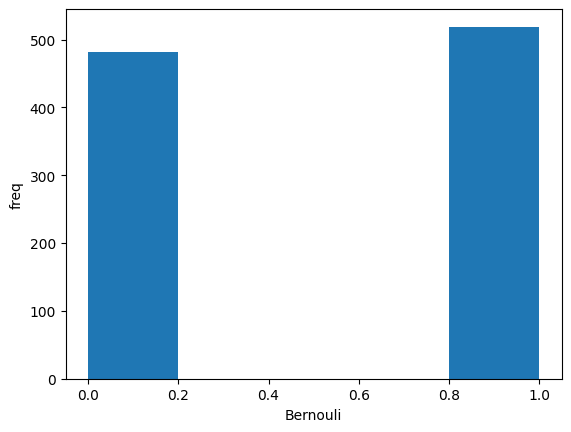

In [13]:
from scipy.stats import bernoulli

#a single observation
data_s = bernoulli.rvs(size=1,p=0.5)

#generate data (1000 points, possible outs: 1 or 0, probability: 50% for each)
data_m = bernoulli.rvs(size=1000,p=0.5)

ax = sns.distplot(data_m,kde=False,hist_kws={"linewidth": 10,'alpha':1})
ax.set(xlabel='Bernouli', ylabel='freq')

#### Binomial distributions
Bernoulli was for a single observation. More than one Bernoulli observations create a binomial distribution. For example, tossing a coin several times in a row.

Trials are independent of each other. The result of one attempt does not affect the next.

The binomial distribution can be expressed as B(n, p ). n is the number of trials and p is the probability of success.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*kGuVKvUcstJopi00ldp0IQ.png">

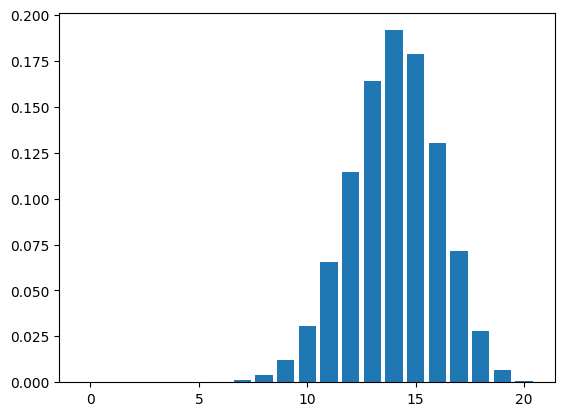

In [16]:
from scipy.stats import binom

n = 20 # the number of experiment
p = 0.7 # probability of success
r = list(range(n + 1)) # the number of success
# pmf values
pmf_list = [binom.pmf(r_i, n, p) for r_i in r ]
# plot
plt.bar(r, pmf_list)
plt.show()

#### Uniform distributions
All outcomes have the same probability of success. Rolling a dice, 1 to 6.

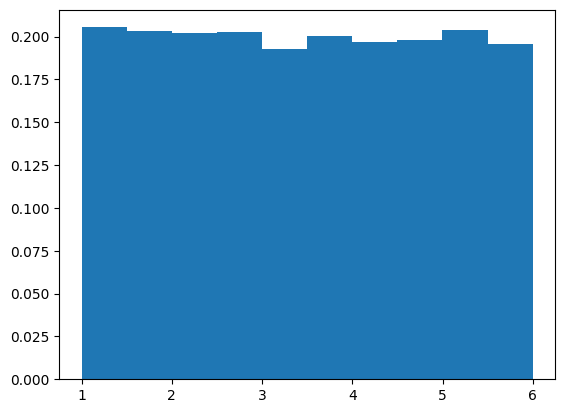

In [18]:
import matplotlib.pyplot as plt

# low=1, high=6, size=6000
data = np.random.uniform(1, 6, 6000)
#plot
plt.hist(data, density = True)
plt.show()

#### Poisson distribution
It is a distribution related to the frequency at which the outcome of an event occurs in a given time interval.

Po(λ), λ is the excepted events in the specified time interval. It is the known average of the events happening in that time interval. X is the number of times the event happened in the specified time interval.

In the Poisson distribution, the events are independent of each other. An event can occur any number of times. Two events cannot happen at the same time.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*moCZsk1ghRcLlppxbZICfQ.png">

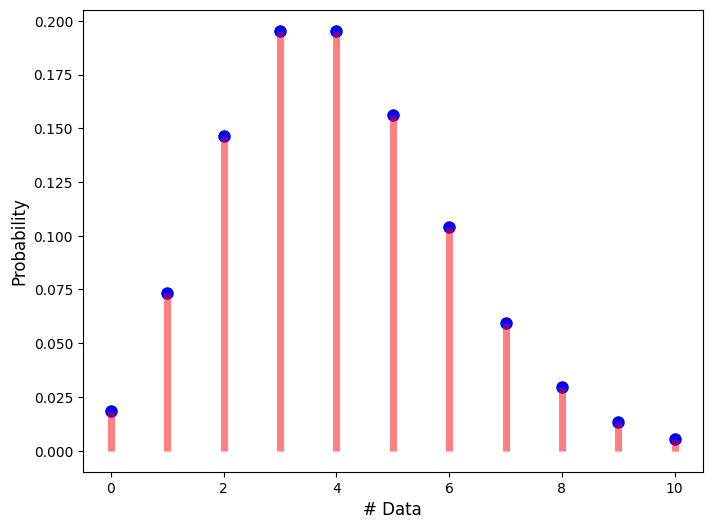

In [20]:
from scipy.stats import poisson
r = range(0,11) #number of data
lambda_val = 4 #mean
# Probability values
data = poisson.pmf(r, lambda_val)
# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(r, data, 'bo', ms=8, label='poisson')
plt.ylabel("Probability", fontsize="12")
plt.xlabel("# Data", fontsize="12")
ax.vlines(r, 0, data, colors='r', lw=5, alpha=0.5)

### Distribuciones continuas

#### Normal distribution
The most famous and common one (also called Gaussian Distribution), is a bell-shaped curve. It can be defined by mean and standard deviation. The expected value of a normal distribution is the mean.

The curve is symmetric. Mean, median, and mode are equal. The total area under the curve is 1.

About 68% of the values lie within one standard deviation range. ~95% is within the two standard deviation range and ~98.7% is within the three-standard deviation range.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*czOMiqi1BrmRNVRC2TPZIQ.png">

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*V4TzKv9Kwon_pXmXaChtRg.png">

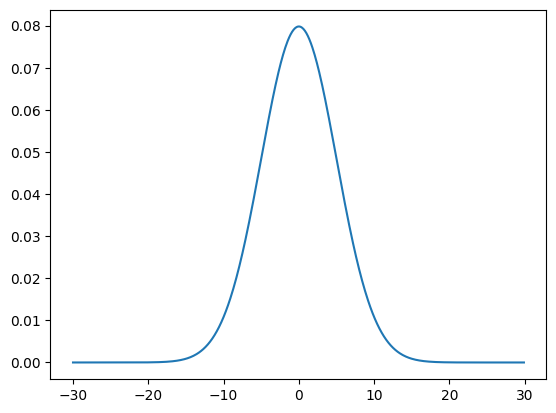

In [22]:
import scipy
mean = 0
standard_deviation = 5
x_values = np. arange(-30, 30, 0.1)
y_values = scipy.stats.norm(mean, standard_deviation)
plt.plot(x_values, y_values. pdf(x_values))

#### Lognormal distribution
<img src="https://miro.medium.com/v2/resize:fit:626/format:webp/1*Kh9iJ6psh4tqhr0wkbFMtA.png">



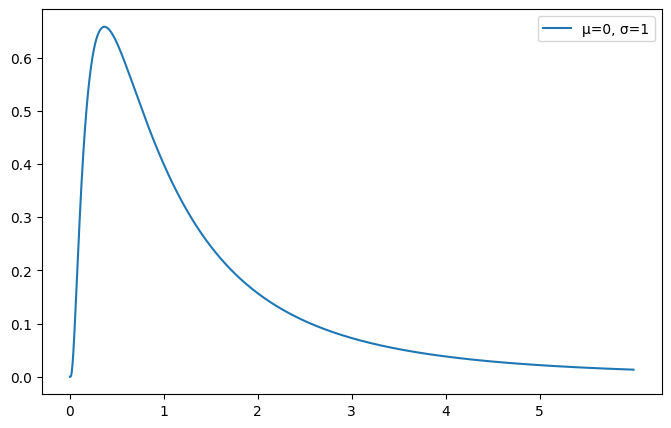

In [23]:
from scipy import stats
X = np.linspace(0, 6, 1500)
std = 1
mean = 0
lognorm_distribution = stats.lognorm([std], loc=mean)
lognorm_distribution_pdf = lognorm_distribution.pdf(X)
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(X, lognorm_distribution_pdf, label="μ=0, σ=1")
ax.set_xticks(np.arange(min(X), max(X)))
plt.legend()
plt.show()

#### Exponential distribution
We examined the events that took place in a certain time interval in the Poisson distribution. In the exponential distribution, we focus on the time elapsed between two events. If we turn the above example upside down, how long does it take between two calls?
F(x;λ)=1-ₑ-λx

(array([2.89752892e-01, 8.96993843e-02, 2.82798152e-02, 8.21162042e-03,
        2.01100908e-03, 5.86544316e-04, 2.09480113e-04, 1.25688068e-04,
        4.18960226e-05, 4.18960226e-05]),
 array([1.23077061e-05, 2.38687373e+00, 4.77373515e+00, 7.16059658e+00,
        9.54745800e+00, 1.19343194e+01, 1.43211808e+01, 1.67080423e+01,
        1.90949037e+01, 2.14817651e+01, 2.38686265e+01]),
 <BarContainer object of 10 artists>)

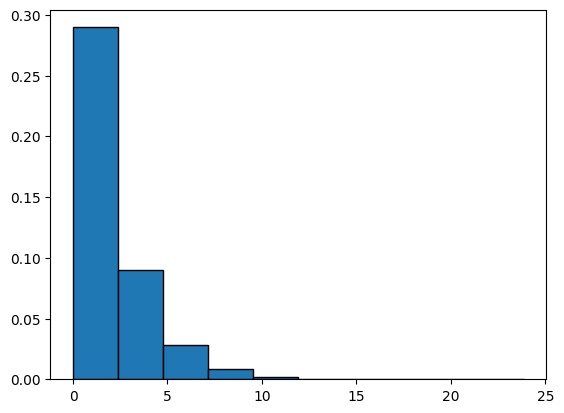

In [25]:
from scipy.stats import expon
x = expon.rvs(scale=2, size=10000) #2 calls
#plot
plt.hist(x, density=True, edgecolor='black')

#### Weibull Distribution
It is an extension of exponential distributions. We cannot use exponential distributions when the time between events is variable rather than constant. In the Weibull distribution, the time interval is allowed to change dynamically.

β is the shape parameter, and if it is a positive value, the probability of an event is increasing over time and vice versa. η is the scale parameter.

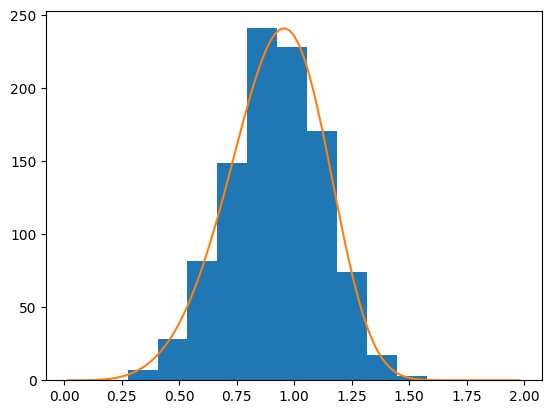

In [26]:
x = np.arange(1,100.)/50.
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)
count, bins, ignored = plt.hist(np.random.weibull(5.,1000))
x = np.arange(1,100.)/50.
scale = count.max()/weib(x, 1., 5.).max()
plt.plot(x, weib(x, 1., 5.)*scale)
plt.show()

#### Gamma Distribution
The exponential distribution is related to the time until the first event occurs, while the gamma is related to the time to pass for n-th the event.

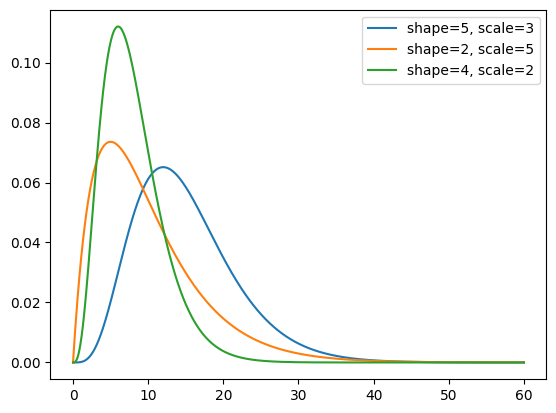

In [27]:
#Gamma distributions
x = np.linspace(0, 60, 1000)
y1 = stats.gamma.pdf(x, a=5, scale=3)
y2 = stats.gamma.pdf(x, a=2, scale=5)
y3 = stats.gamma.pdf(x, a=4, scale=2)
#plots
plt.plot(x, y1, label='shape=5, scale=3')
plt.plot(x, y2, label='shape=2, scale=5')
plt.plot(x, y3, label='shape=4, scale=2')
#add legend
plt.legend()
#display plot
plt.show()

#### Chi-squared Distribution
It is used for statistical testing. This is not usually found in real-world distributions.

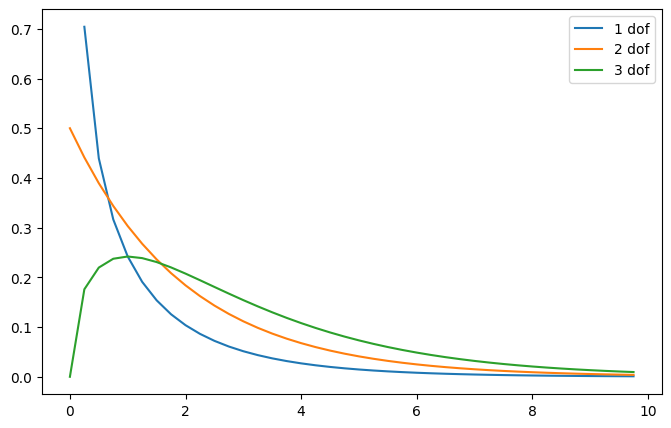

In [29]:
#x-axis ranges from 0 to 20 with .001 steps
X = np.arange(0, 10, 0.25)
plt.subplots(figsize=(8, 5))
plt.plot(X, stats.chi2.pdf(X, df=1), label="1 dof")
plt.plot(X, stats.chi2.pdf(X, df=2), label="2 dof")
plt.plot(X, stats.chi2.pdf(X, df=3), label="3 dof")
plt.legend()
plt.show()

#### Beta Distribution
The beta distribution is a continuous probability distribution defined on the interval [0, 1]. It is often used to model random variables that represent probabilities or proportions.
The parameters α and β control the shape of the distribution. When both α and β are greater than 1, the distribution is unimodal and symmetric, with the peak at the center. As α and β decrease, the distribution becomes more skewed. If α < 1 and β > 1, the distribution is skewed to the right, while α > 1 and β < 1 result in left-skewed distributions. When α = β = 1, the beta distribution reduces to a uniform distribution on [0, 1].

The beta distribution can be updated and become narrower (tighter) as more data is collected. This is due to the influence of the shape parameters α and β.

Initially, when there is little data available, the shape parameters α and β might be small, resulting in a relatively wide and uncertain distribution. As more data points are collected, the values of α and β can be updated based on the observed data, which leads to a more accurate representation of the underlying distribution.

Intuitively, the shape parameters α and β can be thought of as representing the number of “successes” and “failures” observed in the data, respectively. As more successes are observed, α increases, and as more failures are observed, β increases. This leads to a concentration of probability density around the estimated success rate or proportion.

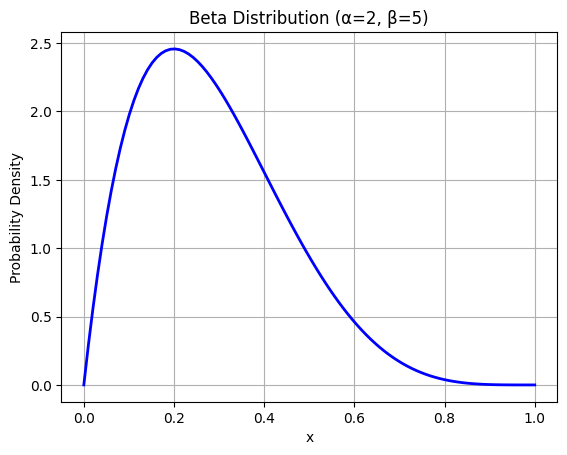

In [30]:
from scipy.stats import beta
a = 2
b = 5
x = np.linspace(0, 1, 100)
pdf = beta.pdf(x, a, b)
plt.plot(x, pdf, 'b-', lw=2)
plt.title('Beta Distribution (α={}, β={})'.format(a, b))
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

## Best Theoretical Distribution for Your Data
The easiest manner to determine the underlying distribution is by visually inspecting the random variable(s) using a histogram. With the candidate distribution, various plots can be created such as the Probability Distribution Function plot (PDF/CDF), and the QQ plot. However, to determine the exact distribution parameters (e.g., loc, scale), it is essential to use quantitative methods.

When it comes to data, it is important to explore the fundamental characteristics of the data too, such as skewness, kurtosis, outliers, distribution shape, univariate, bimodal, etc. Based on these characteristics it is easier to decide which models are best to use because most models have prerequisites for the data. As an example, a well-known and popular technique is Principal Component Analysis (PCA). This method computes the covariance matrix and requires the data to be multivariate normal for the PCA to be valid. In addition, a PCA is also known to be sensitive to outliers. Thus, before doing a PCA step, you need to know whether your data needs a (log)normalization or whether outliers need to be removed.

1. Compute density and weights from a histogram. The first step is to flatten the data into an array and create the histogram by grouping observations into bins and counting the number of events in each bin. The choice of the number of bins is important as it controls the coarseness of the distribution. Experimenting with different bin sizes can provide multiple perspectives on the same data.

2. Estimate the distribution parameters from the data. In a parametric approach, the next step is to estimate the shape, location, and scale parameters based on the (selected) theoretical distribution(s). This typically involves methods such as maximum likelihood estimation (MLE) to determine the values of the parameters that best fit the data. For example, if the normal distribution is chosen, the MLE method will estimate the mean and standard deviation of the data.

3. Check the goodness-of-fit. Once the parameters have been estimated, the fit of the theoretical distribution is evaluated. This can be done using a goodness-of-fit test. Popular statistical tests are Residual Sum of Squares (RSS, also named SSE), Wasserstein, Kolmogorov-Smirnov, and the Energy test.

4. Selection of best theoretical distribution. At this point, theoretical distributions are tested and scored using the goodness-of-fit test statistic. The scores can now be sorted and the theoretical distribution with the best score can be selected.

In [ ]:
!pip install distfit

In [37]:
from distfit import distfit

# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

# Initialize using the parametric approach.
dfit_t = distfit(method="parametric", todf=True)

# Alternatively limit the search for only a few theoretical distributions.
dfit_r = distfit(method='parametric', todf=True, distr=['norm', 'expon'])

# Fit model on input data X.
dfit_t.fit_transform(X)

# Print the bet model results.
dfit_t.model

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000352283] [loc=1.986 scale=3.993]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.103938] [loc=-12.126 scale=14.112]
[distfit] >INFO> [pareto    ] [0.05 sec] [RSS: 0.103938] [loc=-1073741836.126 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [0.36 sec] [RSS: 0.00218462] [loc=1.907 scale=3.408]
[distfit] >INFO> [t         ] [1.96 sec] [RSS: 0.000352283] [loc=1.986 scale=3.993]
[distfit] >INFO> [genextreme] [0.64 sec] [RSS: 0.000844478] [loc=0.475 scale=3.957]
[distfit] >INFO> [gamma     ] [0.11 sec] [RSS: 0.000347067] [loc=-334.013 scale=0.047]
[distfit] >INFO> [lognorm   ] [0.75 sec] [RSS: 0.000347783] [loc=-275.856 scale=277.816]
[distfit] >INFO> [beta      ] [0.16 sec] [RSS: 0.00034766] [loc=-119.606 scale=312.135]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0740602] [loc=-12.126 scale=29.239]
[distfit] >INFO> [loggamma  ] [0.26 sec] [RSS: 0.000371637] [loc=-907.576 scale=130.

{'name': 'gamma',
 'score': 0.0003470666455810323,
 'loc': -334.0126021223797,
 'scale': 0.04745927345964861,
 'arg': (7079.724951595646,),
 'params': (7079.724951595646, -334.0126021223797, 0.04745927345964861),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f52adaa78e0>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': -4.555261633636405,
 'CII_max_alpha': 8.581224539271432}

In [38]:
# Print the scores of the distributions:
dfit_t.summary[['name', 'score', 'loc', 'scale']]

,name,score,loc,scale
0,gamma,0.000347,-334.012602,0.047459
1,beta,0.000348,-119.606493,312.134758
2,lognorm,0.000348,-275.856088,277.816253
3,t,0.000352,1.986012,3.993285
4,norm,0.000352,1.986014,3.993285
5,loggamma,0.000372,-907.575927,130.50681
6,genextreme,0.000844,0.475319,3.957035
7,dweibull,0.002185,1.906551,3.408478
8,uniform,0.07406,-12.125884,29.239145
9,expon,0.103938,-12.125884,14.111898


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Gamma (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

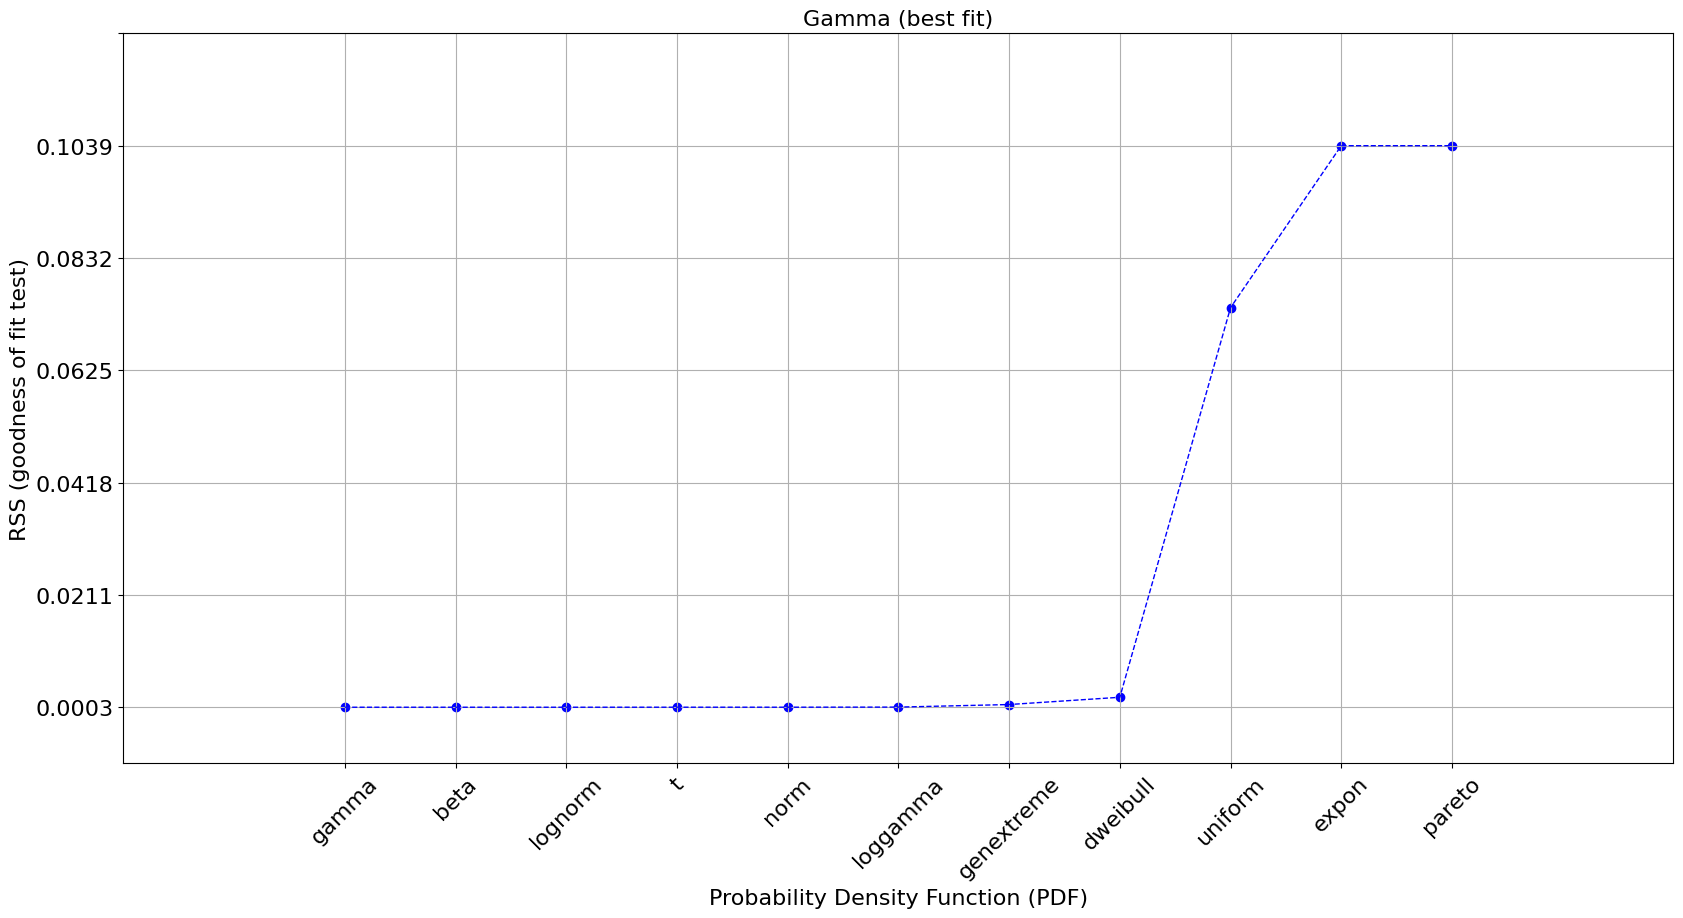

In [40]:
dfit_t.plot_summary()

In [41]:
# Bootstrapping
dfit_t.bootstrap(X, n_boots=100)

# Print
print(dfit_t.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']])

    name     score bootstrap_score bootstrap_pass
0   norm   0.00041               0           None
1  expon  0.111437               0           None


(<Figure size 2000x1000 with 2 Axes>,
 <Axes: title={'center': 'Lognorm (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

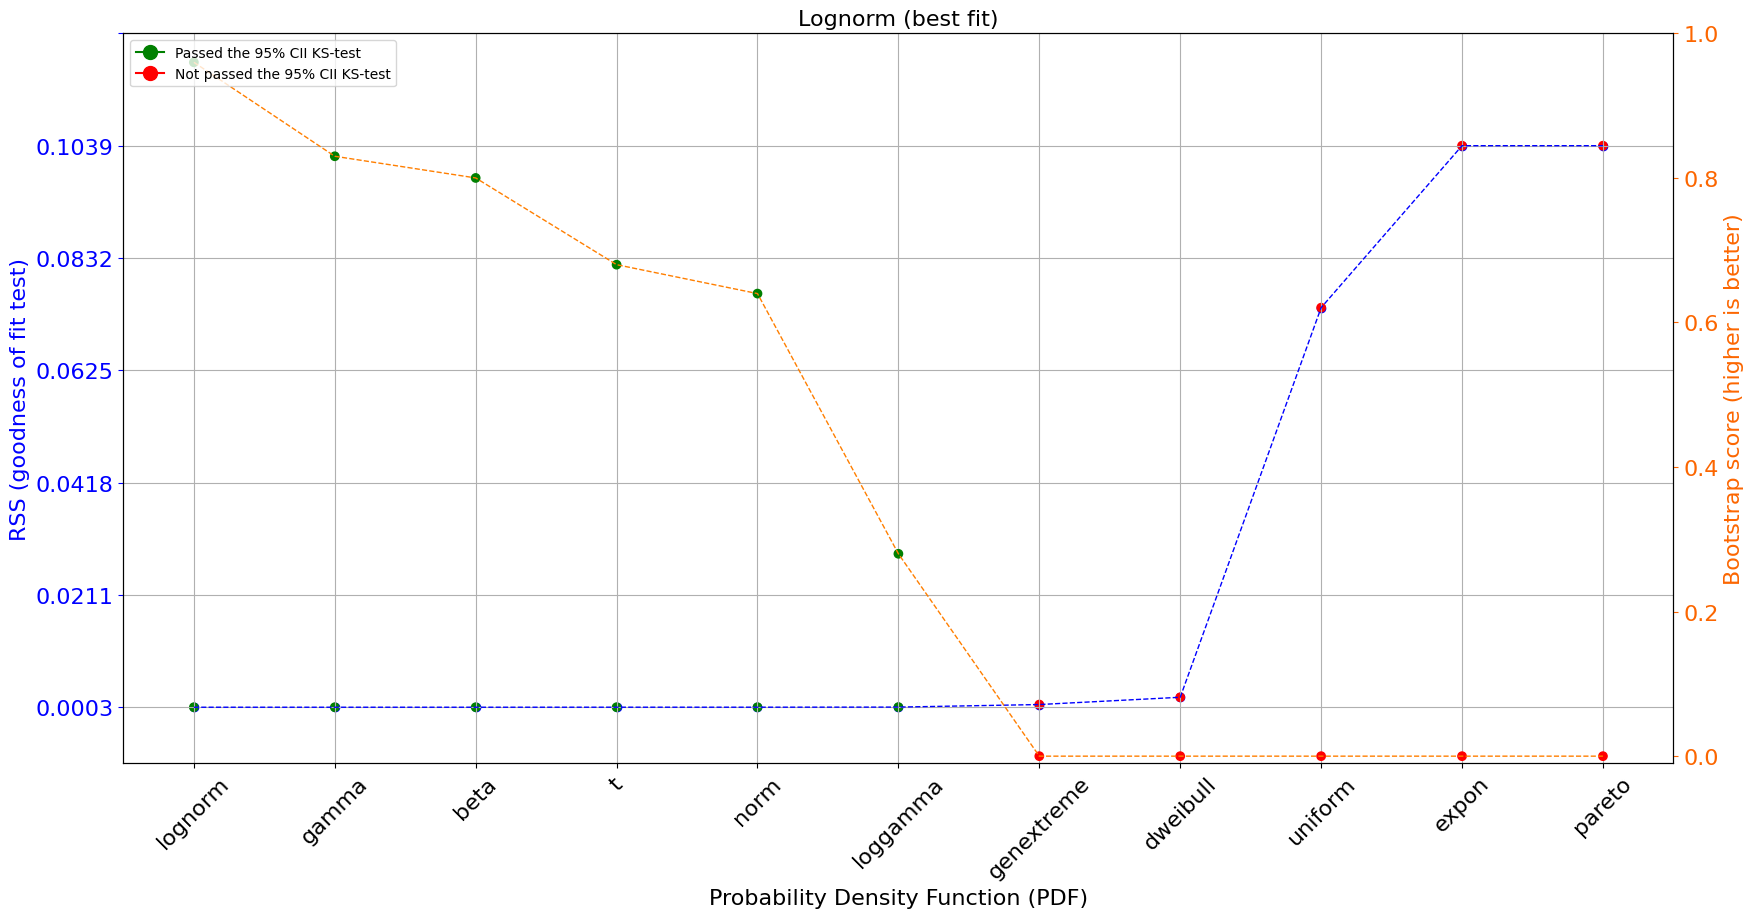

In [42]:
# Plot the RSS and bootstrap scores of the fitted distributions.
dfit_t.plot_summary()

A best practice is to use both statistics and a visual curation to decide what the best distribution fit is. Using the PDF/CDF and QQ plots can be some of the best tools to guide those decisions.

As an example, the Figure illustrates the goodness-of-fit test statistics for which the first 7 PDFs have a very similar and low RSS score. The dweibull distribution is ranked number 8, with also a low RSS score. However, a visual inspection will learn us that, despite having a relatively low RSS score, it is not a good fit after all.

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nlognorm(s=0.0143534, loc=-275.856, scale=277.816)'}, xlabel='Values', ylabel='Frequency'>)

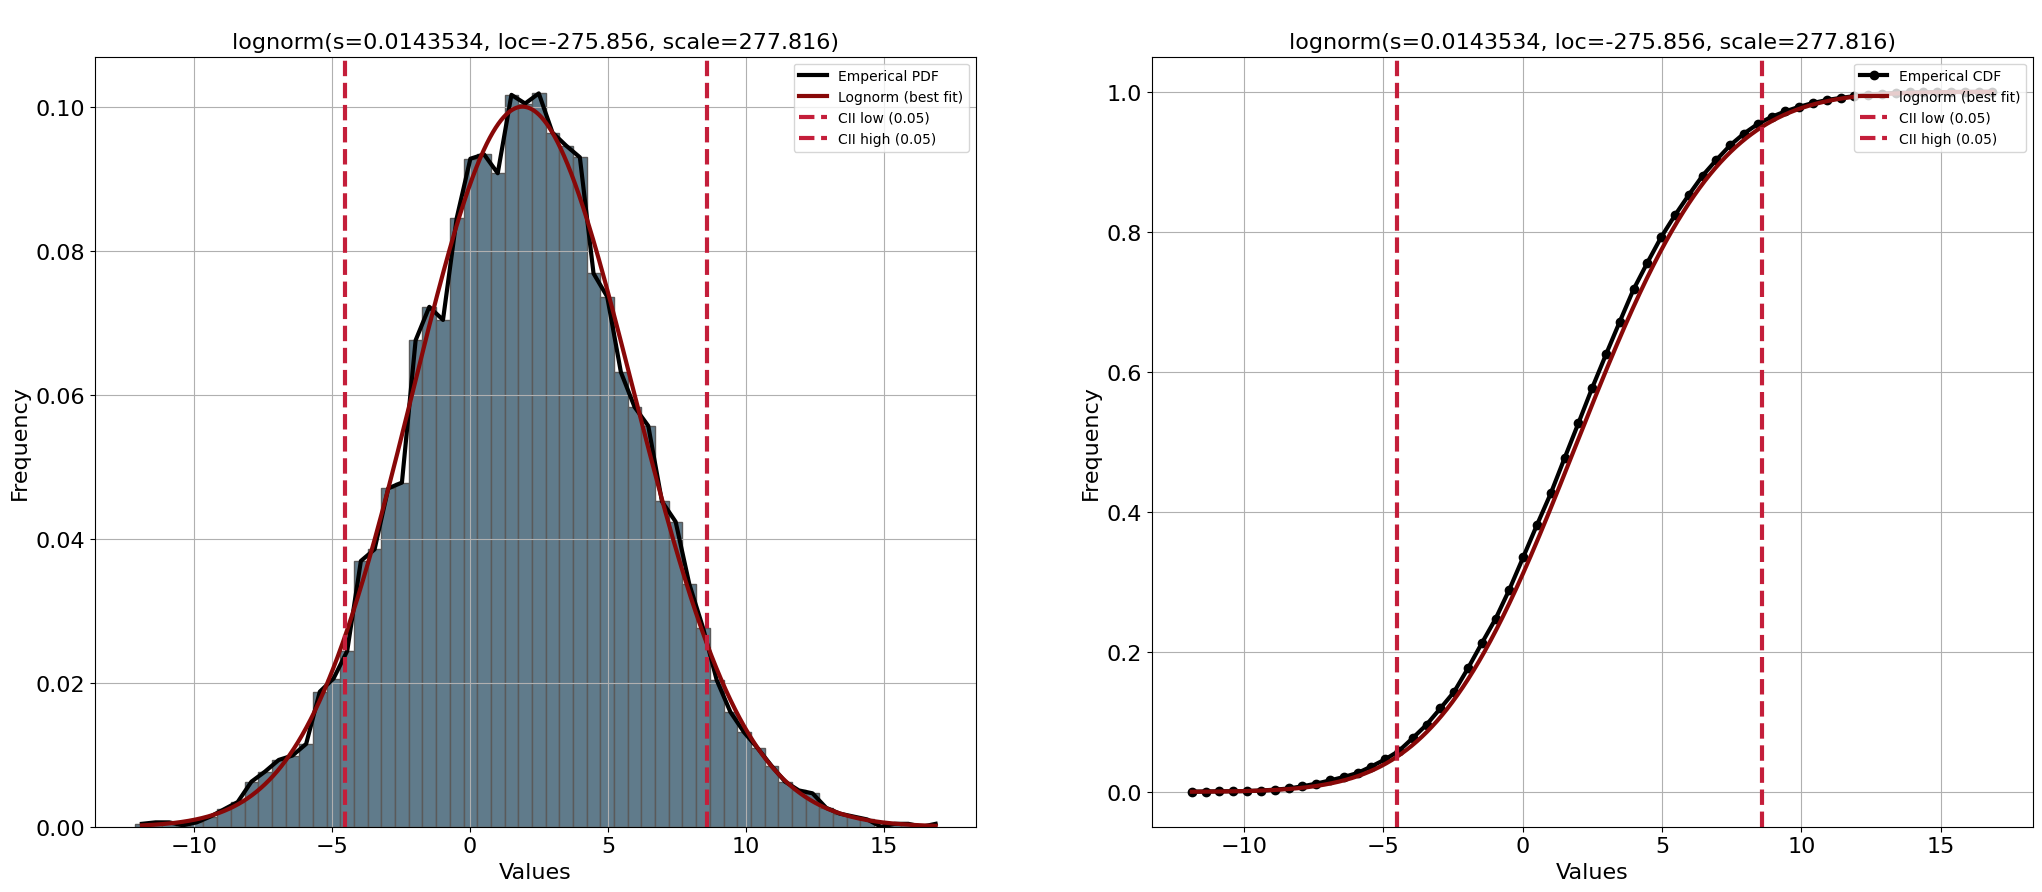

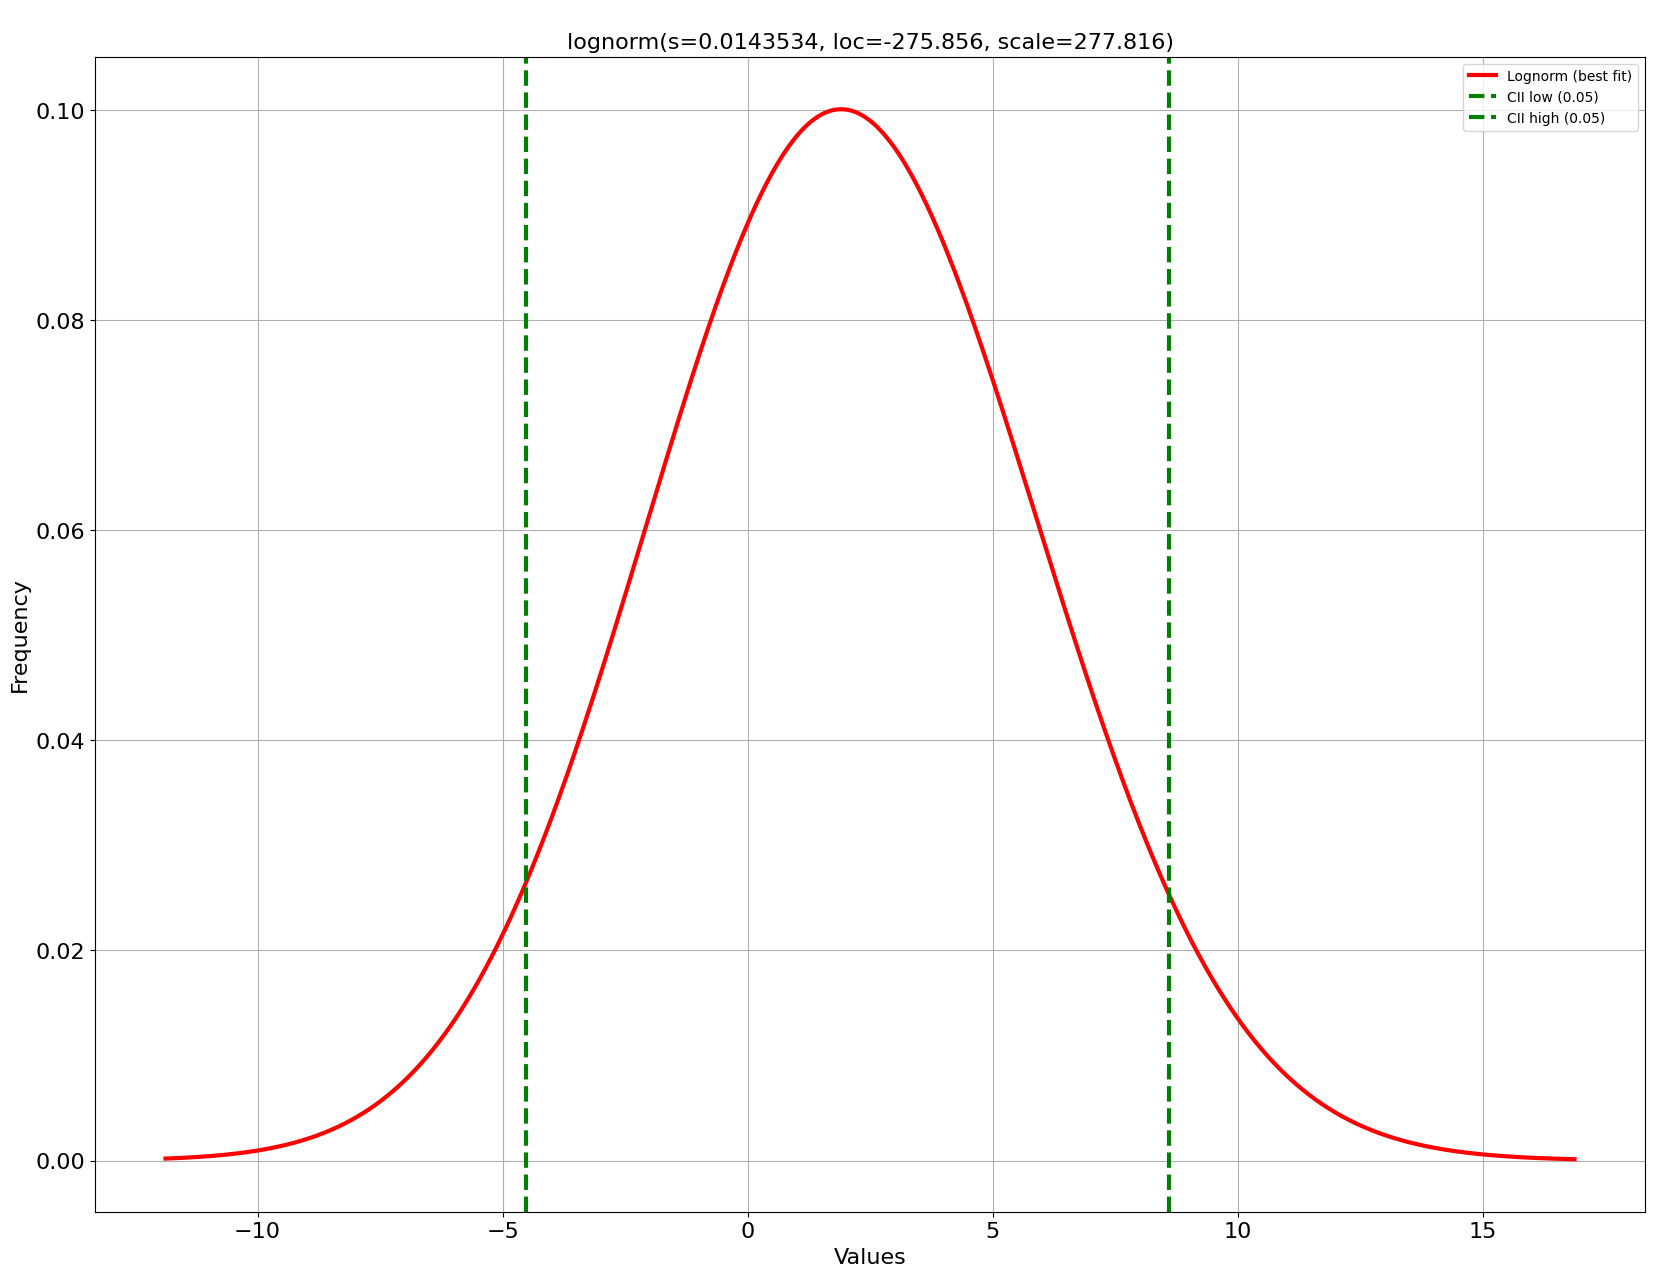

In [43]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit_t.plot(chart='PDF', ax=ax[0])
# Plot the CDF
dfit_t.plot(chart='CDF', ax=ax[1])

# Change or remove properties of the chart.
dfit_t.plot(chart='PDF',
          emp_properties=None,
          bar_properties=None,
          pdf_properties={'color': 'r'},
          cii_properties={'color': 'g'})

(None,
 <Axes: title={'center': '\nlognorm(s=0.0143534, loc=-275.856, scale=277.816)'}, xlabel='Values', ylabel='Frequency'>)

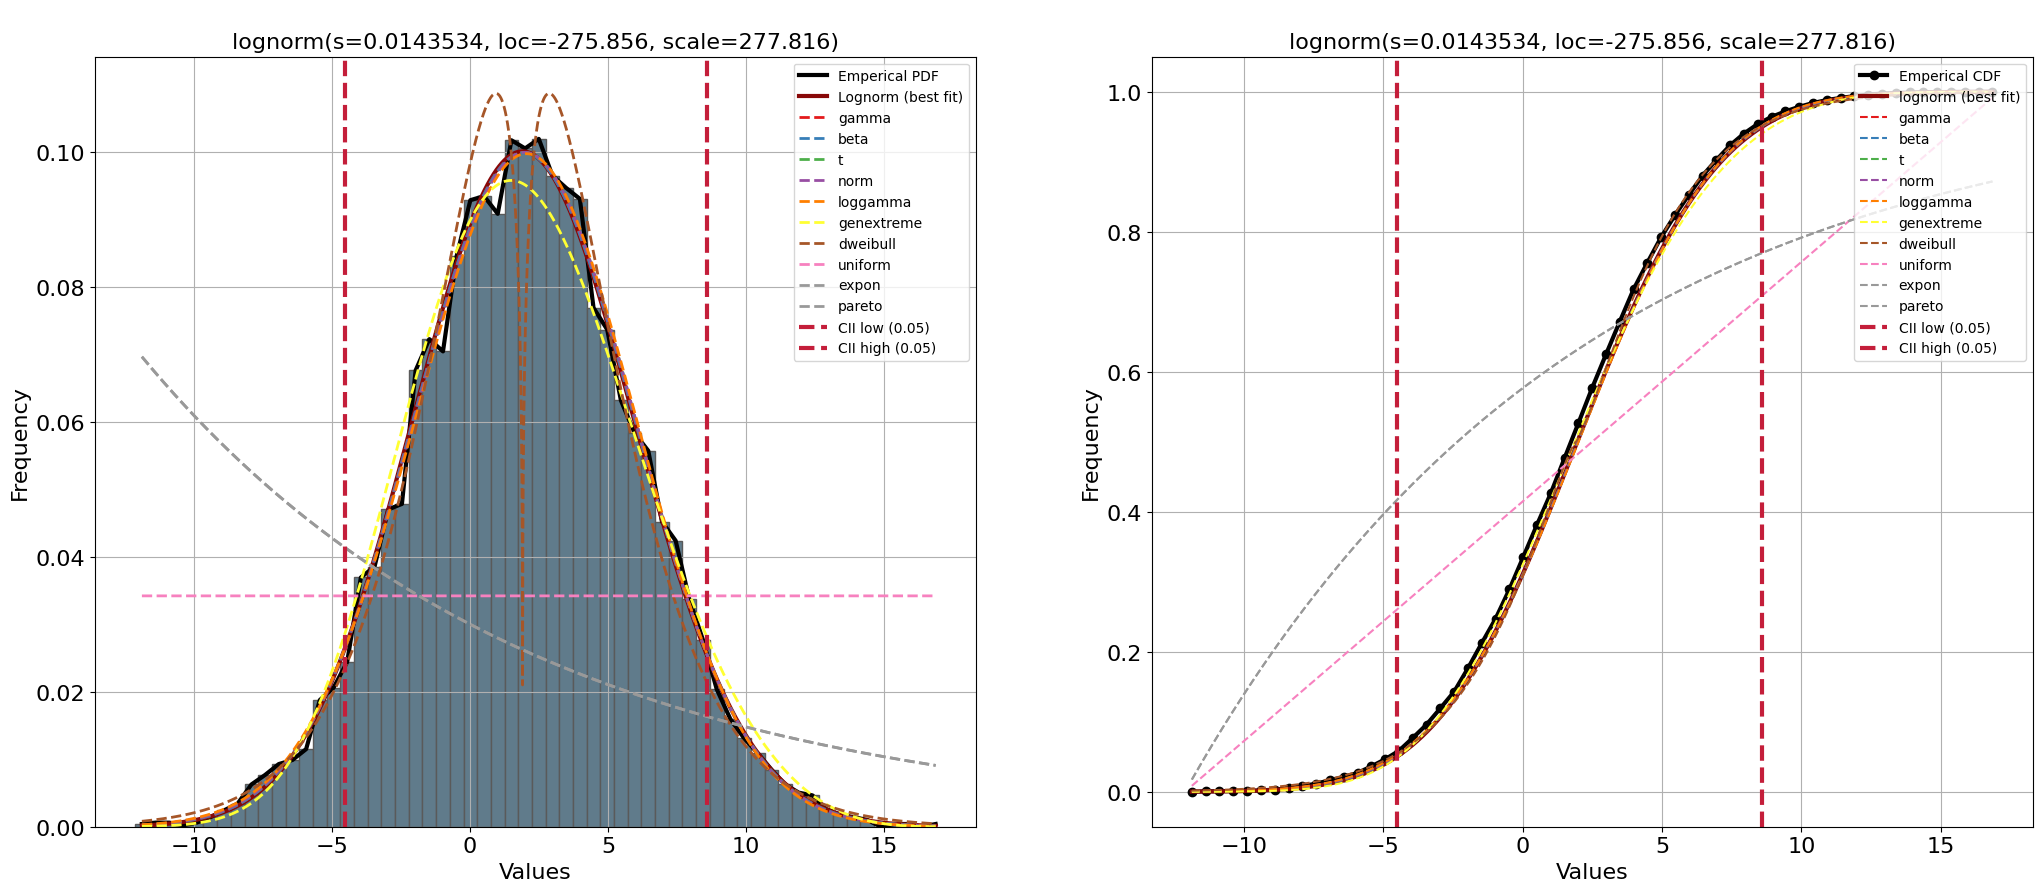

In [44]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit_t.plot(chart='PDF', n_top=11, ax=ax[0])
# Plot the CDF
dfit_t.plot(chart='CDF', n_top=11, ax=ax[1])

There is one more plot that we can inspect, which is the QQ plot. The QQ plot compares the empirical probability distributions vs. the theoretical probability distributions by plotting their quantiles against each other. If the two distributions are equal then the points on the QQ-plot will perfectly lie on a straight line y = x. We can make the QQ-plot using the qqplot function (Figure 5).

(None,
 <Axes: title={'center': 'QQ-plot\nlognorm(s=0.0143534, loc=-275.856, scale=277.816)'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>)

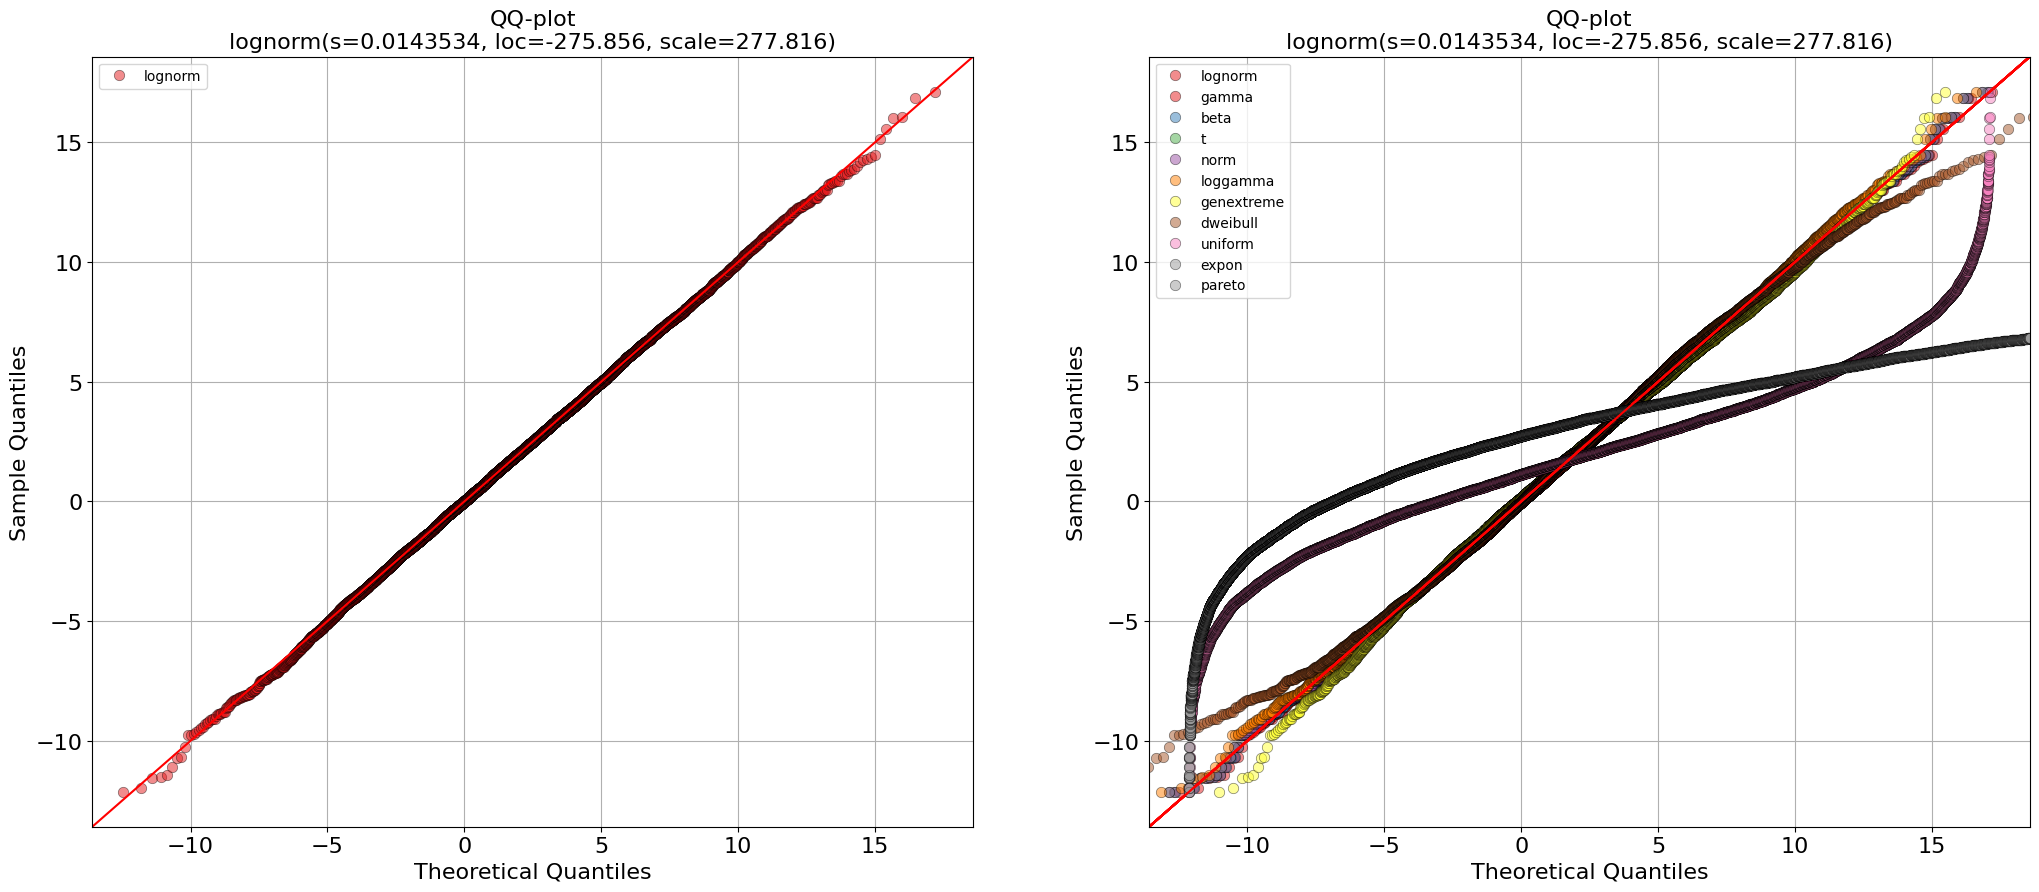

In [45]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot left panel with best fitting distribution.
dfit_t.qqplot(X, ax=ax[0])
# plot right panel with all fitted theoretical distributions
dfit_t.qqplot(X, n_top=11, ax=ax[1])

## Importar datos

importar en python los mapas raster

In [2]:
ruta='https://github.com/edieraristizabal/Libro_cartoGeotecnia/blob/master/data/miel/'

In [3]:
file = gdal.Open(ruta+'Aspecto.tif?raw=true')
raster = file.GetRasterBand(1)
aspecto = raster.ReadAsArray()
aspecto=np.where(aspecto==-999.,np.nan,aspecto)

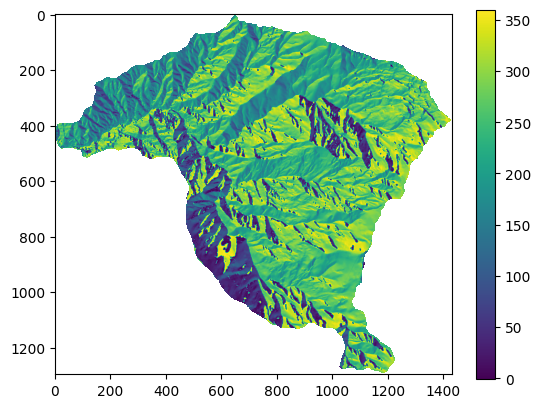

In [4]:
plt.imshow(aspecto)
plt.colorbar()


In [ ]:

aspecto=np.where(aspecto==-999,np.nan,aspecto)
print('Dimensiones de la matriz del mapa de aspecto:', aspecto.shape)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
print('Dimensiones del vector de aspecto:',aspecto_vector_MenM.shape)

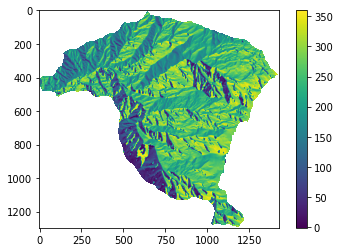

In [ ]:
plt.imshow(aspecto)
plt.colorbar()

Antes de generar el dataframe con las diferentes variables, es necesario entonces importar todas las variables y realizar los ajustes que sean necesarios.

In [5]:
file = gdal.Open(ruta+'CurvaturaPerfil.tif?raw=true')
raster = file.GetRasterBand(1)
curvatura = raster.ReadAsArray()
curvatura = np.where(curvatura==-999,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
print('Dimensiones del vector de curvatura:',curvatura_vector_MenM.shape)

Dimensiones del vector de curvatura: (910801,)


In [6]:
file = gdal.Open(ruta+'FlujoAcumulado.tif?raw=true')
raster = file.GetRasterBand(1)
flujo = raster.ReadAsArray()
flujo = np.where(flujo==-999,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
print('Dimensiones del vector de flujo:',flujo_vector_MenM.shape)

Dimensiones del vector de flujo: (910801,)


In [7]:
file = gdal.Open(ruta+'Geologia_Superficial.tif?raw=true')
raster = file.GetRasterBand(1)
geologia = raster.ReadAsArray()
geologia = np.where(geologia==-999,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
print('Dimensiones del vector de geología:',geologia_vector_MenM.shape)

Dimensiones del vector de geología: (910801,)


In [8]:
file = gdal.Open(ruta+'Pendiente.tif?raw=true')
raster = file.GetRasterBand(1)
pendiente1 = raster.ReadAsArray()
pendiente = np.where(pendiente1==-999,np.nan,pendiente1)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
print('Dimensiones del vector de pendiente:',pendiente_vector_MenM.shape)

Dimensiones del vector de pendiente: (910801,)


In [9]:
file = gdal.Open(ruta+'Inventario_MenM.tif?raw=true')
raster = file.GetRasterBand(1)
inventario = raster.ReadAsArray()
inventario=np.where(pendiente1!=-999.0,inventario,np.nan)
print('Dimensiones de la matriz del inventario:', inventario.shape)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
inventario_vector_MenM.shape
print('Dimensiones del vector de inventario:',inventario_vector_MenM.shape)

Dimensiones de la matriz del inventario: (1297, 1430)
Dimensiones del vector de inventario: (910801,)


Con cada uno de los vectores de las variables independientes y dependiente, se conforma un diccionario, para luego formar un DataFrame con todas las variables, y posteriormente armar un DataFrame solo con las variables predictoras (X) y un vector con la variable dependiente (y).

In [ ]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'geologia':geologia_vector_MenM,'flujo':flujo_vector_MenM,'aspecto':aspecto_vector_MenM,
   'curvatura':curvatura_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))
X=df.drop('inventario',axis=1)
print(X.columns)
print('Número de filas y columnas de los features:', X.shape)
y=df['inventario']
print('Número de filas del label:',y.shape)

['inventario', 'pendiente', 'geologia', 'flujo', 'aspecto', 'curvatura']
Index(['pendiente', 'geologia', 'flujo', 'aspecto', 'curvatura'], dtype='object')
Número de filas y columnas de los features: (910801, 5)
Número de filas del label: (910801,)


In [ ]:
X.head()

,pendiente,geologia,flujo,aspecto,curvatura
0,10.862183,14.0,0.0,208.523560,-13.435433
1,12.265345,14.0,0.0,207.437332,-15.551539
2,12.469252,14.0,0.0,202.684647,-17.843397
3,13.148026,14.0,0.0,211.619766,-15.778575
4,14.091524,14.0,0.0,220.028976,-13.046625


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: inventario, dtype: float64

Es importante tambien crear una matriz solo con las variables predictoras continuas, ya que muchos de los métodos a utilizar solo trabajan con este tipo de variables.

In [ ]:
X_cont=X.drop(['geologia'],axis=1)
X_array_cont=X.values
X_cont.head()

,pendiente,flujo,aspecto,curvatura
0,10.862183,0.0,208.523560,-13.435433
1,12.265345,0.0,207.437332,-15.551539
2,12.469252,0.0,202.684647,-17.843397
3,13.148026,0.0,211.619766,-15.778575
4,14.091524,0.0,220.028976,-13.046625


Para obtener los estadísticos básicos de todas las variables continuas se utiliza

In [ ]:
print(X_cont.describe().T)

              count         mean           std         min         25%  \
pendiente  910801.0    29.091623     11.522072    0.000000   21.586218   
flujo      910801.0  2910.610840  96535.351562    0.000000    4.000000   
aspecto    910801.0   213.760437    100.318275   -1.000000  154.172882   
curvatura  910801.0     0.000519      6.661425 -425.963684   -1.282190   

                  50%         75%           max  
pendiente   29.483625   36.847805  7.789451e+01  
flujo       11.000000   26.000000  5.650063e+06  
aspecto    237.852829  291.331726  3.599995e+02  
curvatura   -0.025257    1.062094  4.648697e+02  


El problema a resolver corresponde a un método supervisado tipo clasificación, donde la variable dependiente es categórica dicotómica (la ocurrencia o no de movimientos en masa en una celda), por lo tanto es útil conocer el número de celdas con y sin MenM que permitirá entrenar el modelo.

In [ ]:
y.value_counts()

0.0    909181
1.0      1620
Name: inventario, dtype: int64

Para saber la media de cada variable independiente de acuerdo con la variable dependiente. Para esto utilizamos el DataFrame inicial (df) donde se agruparon todas las variables.

In [ ]:
media=df.groupby('inventario').mean()
print(media)

            pendiente   geologia        flujo     aspecto  curvatura
inventario                                                          
0.0         29.082050  10.233438  2915.758057  213.785950   0.001642
1.0         34.459793   8.787037    21.809259  199.425674  -0.629323


Inicialmente para conocer el comportamiento bivariado de todas las variables se utiliza la matriz de scattering con Panda. Sin embargo tenga en cuenta que este método toma tiempo en ejecutarse.

In [ ]:
pd.plotting.scatter_matrix(X_cont, alpha = 0.3, figsize = (14,10), diagonal='kde');

La librería de *Seaborn* es similar a Matplotlib, sin embargo presenta gráficas con mejores diseños. La matriz de scattering utilizando *Seaborn* se genera de la siguiente manera, y de forma similar al caso anterior toma tiempo.

In [ ]:
sns.pairplot(df, hue='inventario');

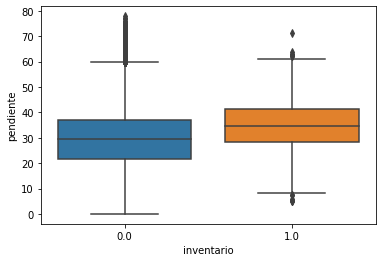

In [ ]:
sns.boxplot(data=df, x='inventario', y='pendiente');

In [ ]:
sns.histplot(data=df, x='inventario', hue='pendiente', bins=50);

In [ ]:
sns.histplot(x='inventario', data=df, hue='pendiente', bins=len(df), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);
plt.title("Cumulative distribution function");

## Análisis univariado

Para generar el histograma de una sola variable se puede utilizar el siguiente código con el método *hist*.:

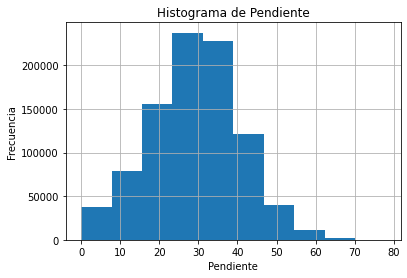

In [ ]:
X.pendiente.hist()
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia');


Con la librearía *Seaborn* se puede generar el *displot* de las diferentes variables.

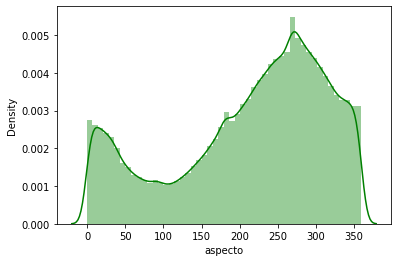

In [ ]:
sns.distplot(X['aspecto'],color='g');

Para generar el histograma de las variables continuas.

In [ ]:
X_cont.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10, 4));

ImportError: ignored

Para generar el diagrama de caja de cada variable:

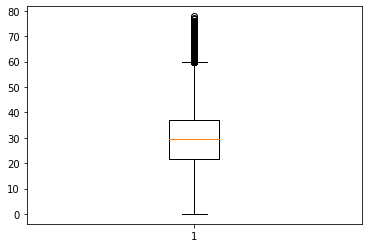

In [ ]:
pendiente=X['pendiente']
plt.boxplot(pendiente);

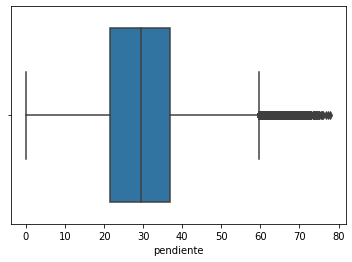

In [ ]:
sns.boxplot(x='pendiente', data=X);

El diagrama tipo Violin brinda información similar al *boxplot*, sin embargo en algunos casos puede brindar información adicional sobre la distribución de los datos.

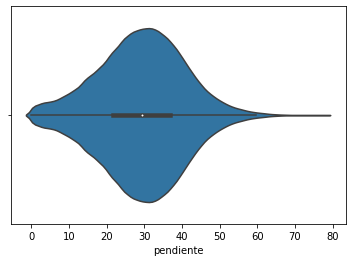

In [ ]:
sns.violinplot(x='pendiente', data=X);

## Análisis Bivariado

El análisis bivariado permite identificar asociación o correlación entre diferentes variables. Se utilizan las siguientes herramientas.

In [ ]:
sns.jointplot(x='pendiente', y='curvatura', data=X, kind='scatter');

In [ ]:
sns.jointplot(x='pendiente', y='flujo', data=X, kind='kde', color='g');

Un análisis muy importante es la distribución de cada variable independiente en función de la variable dependiente. Distribuciones diferentes permite inferir que dicha variable puede ser buena predictora.

Inicialmente se construyen dos nuevos dataFrames filtrando entre celdas donde la variabel independiente es 1 y celdas donde es 0, en este caso CON y SIN movimientos en masa.

In [ ]:
data_sin=df[(df['inventario']==0)]
data_con=df[(df['inventario']==1)]

Con estos dos DataFrames se pueden comparar las variables indepependientes en funcion de y.

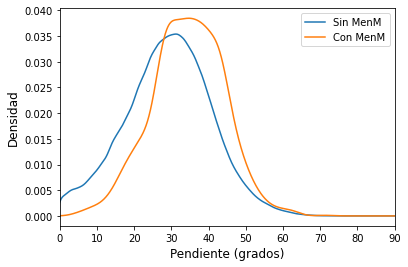

In [ ]:
fig, ax = plt.subplots()
data_sin['pendiente'].plot.kde(ax=ax, label='Sin MenM')
data_con['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (grados)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

## Análisis Multivariado

El análisis multivariado permite analizar tres o mas variables.

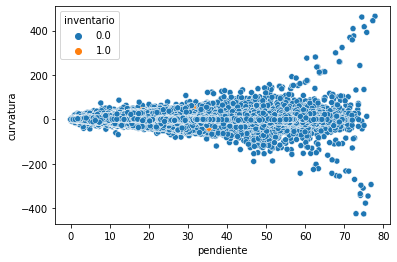

In [ ]:
sns.scatterplot(x="pendiente", y="curvatura", hue="inventario", data=df);

Una etapa fundamental en el análisis multivariado de los datos es evaluar la correlación entre ellos. Para lo cual existen diferentes herramientas. La librearía *statsmodel* brinda herramientas para identificar y plotear la matriz de correlación.

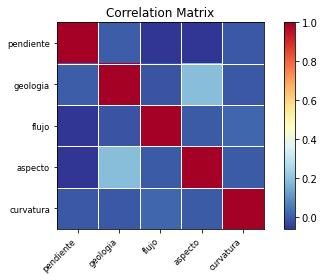

In [ ]:
import statsmodels.graphics.api as smg
MatCorre=DataFrame(X.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns));

Y la libraría *Seaborn* también tiene una función para plotear la matriz, donde a diferencia de las demas marca el valor de la correlación en cada celda.

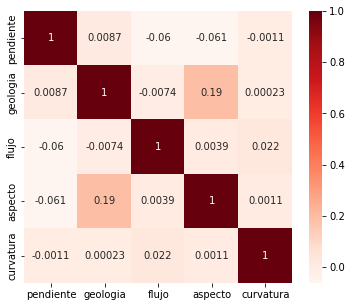

In [ ]:
plt.figure(figsize=(6,5))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()